# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

import numpy as np


import statsmodels.api as sm

from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
df = pd.read_csv('../../data/clean/KingCountyHousingData.csv')
#df.info()

In [3]:
#creating dummies of Water Front Location, dropping None (doesn't have water front location)
df_water_dummie =pd.get_dummies(df['WaterFrontLocation'])
df_water_dummie.drop('None', axis= 1, inplace=True)
#df_water_dummie.head()

In [4]:
#creating dummies of Building Grade, dropping lowest grade--> 1= 'poor'
df_bldg_dummie = pd.get_dummies(df['BldgGrade'])
df_bldg_dummie.drop(1, axis= 1, inplace=True) 
#df_bldg_dummie.head()

In [94]:
df_sqft_dummie = pd.get_dummies(df['SqFtTotLiving'])
#df_sqft_dummie.drop(1, axis= 1, inplace=True) 
df_sqft_dummie.head()

,2,250,280,290,300,310,320,340,356,360,...,8920,9150,9430,9530,9630,9968,10190,10250,10380,10910
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#merge data frames
comb_df = pd.concat([df, df_water_dummie, df_bldg_dummie], axis=1)
#comb_df.head()

In [6]:
#re-name columns 
comb_df = comb_df.rename(columns={"Other lake": "Other_lake","Lake Sammamish":"Lake_Sammamish", 
                                  "Lake Union": "Lake_Union", "Lake Washington": "Lake_Washington", 
                                  "Puget Sound": "Puget_Sound", "River or slough":"River_or_slough", 
                                  "Ship Canal": "Ship_Canal", 2:'Low', 3:'Fair', 4:'Low_Average', 5:'Average',
                                  6 : 'Good', 7 : 'Better', 8 : 'Very_Good', 9 : 'Cabin', 10 : 'Excellent', 11 : 'Luxury', 12 : 'Mansion'})

comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27786 entries, 0 to 27785
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                27786 non-null  int64 
 1   Major                     27786 non-null  int64 
 2   Minor                     27786 non-null  int64 
 3   ZipCode                   27786 non-null  int64 
 4   DocumentDate              27786 non-null  object
 5   SalePrice                 27786 non-null  int64 
 6   SqFtLot                   27786 non-null  int64 
 7   SqFtTotLiving             27786 non-null  int64 
 8   Nuisances                 27786 non-null  object
 9   Has_Nuisance              27786 non-null  int64 
 10  TrafficNoise              27786 non-null  int64 
 11  PowerLines                27786 non-null  int64 
 12  OtherNuisances            27786 non-null  int64 
 13  Is_WaterFrontLocation     27786 non-null  int64 
 14  WaterFrontLocation    

# Correlation

In [7]:
corr_matrix = comb_df.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice                   1.000000
BldgGrade                   0.581476
SqFtTotLiving               0.571867
Very_Good                   0.319422
View_LakeWashington         0.319140
Excellent                   0.295884
Lake_Washington             0.282498
Luxury                      0.253635
Is_WaterFrontLocation       0.216200
Better                      0.205022
Has_OpenPorch               0.181793
Has_Porch                   0.176378
Mansion                     0.170746
SeattleSkyline              0.156437
View_Olympics               0.150045
View_LakeSammamish          0.148652
Lake_Sammamish              0.142783
Has_Finished_Basement       0.135054
View_Cascades               0.109642
View_PugetSound             0.098700
Has_Deck                    0.091775
View_MtRainier              0.064629
Minor                       0.048387
Has_Attached_Garage         0.042360
Puget_Sound                 0.034046
View_SmallLakeRiverCreek    0.030134
Other_lake                  0.020896
S

# Model Testing

 ## Model 1- Base Model

In [8]:
# all features
#returns an R2 of .506
#many p-values above .05
# distribution is not linear, S shaped with tails
# cone shape error distribution

In [63]:
# Baseline model with all features
outcome = 'SalePrice'      
x_cols =['SqFtLot',
 #'SqFtTotLiving',            
 'Nuisances',           
 'Has_Nuisance',             
 'TrafficNoise',             
 'PowerLines',               
 'OtherNuisances',           
 'Is_WaterFrontLocation',    
 'WaterFrontLocation',       
 'Has_Porch',                
 'Has_OpenPorch',            
 'Has_EnclosedPorch',        
 'View_MtRainier',           
 'View_Olympics',            
 'View_Cascades',            
 'SeattleSkyline',           
 'View_PugetSound',          
 'View_LakeWashington',      
 'View_LakeSammamish',       
 'View_SmallLakeRiverCreek', 
 #'BldgGrade',                
 'Has_Deck',                 
 'Has_Finished_Basement',    
 'Has_Attached_Garage',      
 'Duwamish',                 
 'Lake_Sammamish',           
 'Lake_Union',               
 'Lake_Washington',          
 'Other_lake',               
 'Puget_Sound',              
 'River_or_slough',          
 'Ship_Canal',               
 'Low',                      
 'Fair',                     
 'Low_Average',              
 'Average',                  
 'Good',                     
 'Better',                   
 'Very_Good',                
 'Cabin',                    
 'Excellent',                
 'Luxury',                 
 'Mansion']                  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model1 = ols(formula=formula, data=comb_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     640.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:08:42   Log-Likelihood:            -4.0065e+05
No. Observations:               27786   AIC:                         8.014e+05
Df Residuals:                   27746   BIC:                         8.017e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              6.815e+04   1.43e+05      0.475      0.635   -2.13e+05    3.49e+05
Nuisances[T.Other Nuisances]           1.051e+04   1.85e+04      0.567      0.571   -2.58e+04    4.69e+04
Nuisances[T.Power Lines]               5.645e+04   9.04e+04      0.624      0.532   -1.21e+05    2.34e+05
Nuisances[T.Traffic Noise]            -1.065e+04   3.82e+04     -0.279      0.781   -8.56e+04    6.43e+04
WaterFrontLocation[T.Lake Sammamish]   6.155e+05   5.83e+04     10.562      0.000    5.01e+05     7.3e+05
WaterFrontLocation[T.Lake Union]       9.511e+04   2.02e+05      0.470      0.638   -3.01e+05    4.92e+05
WaterFrontLocation[T.Lake Washington]  4.298e+05    4.3e+04      9.997      0.000    3.45e+05    5.14e+05
WaterFrontLocation[T.None]             -1.54e+05   8.12e+04     -1.896      0.058   -3.13e+05    5161.895
WaterFrontLocation[T.Other lake]      -1.916e+05   4.08e+04     -4.694      0.000   -2.72e+05   -1.12e+05
WaterFrontLocation[T.Puget Sound]     -1.089e+05   4.36e+04     -2.494      0.013   -1.94e+05   -2.33e+04
WaterFrontLocation[T.River or slough] -1.793e+05   4.16e+04     -4.315      0.000   -2.61e+05   -9.79e+04
WaterFrontLocation[T.Ship Canal]       9.031e+04   8.51e+04      1.061      0.289   -7.66e+04    2.57e+05
SqFtLot                                   0.0310      0.020      1.578      0.115      -0.008       0.070
Has_Nuisance                            5.63e+04    3.7e+04      1.522      0.128   -1.62e+04    1.29e+05
TrafficNoise                          -2.481e+04   1.02e+04     -2.425      0.015   -4.49e+04   -4756.320
PowerLines                            -1.715e+05   1.24e+05     -1.383      0.167   -4.14e+05    7.15e+04
OtherNuisances                         1.051e+04   1.85e+04      0.567      0.571   -2.58e+04    4.69e+04
Is_WaterFrontLocation                  2.221e+05   7.95e+04      2.796      0.005    6.64e+04    3.78e+05
Has_Porch                              1.868e+04   2.58e+04      0.725      0.468   -3.18e+04    6.92e+04
Has_OpenPorch                          5.934e+04   2.51e+04      2.364      0.018    1.01e+04    1.09e+05
Has_EnclosedPorch                     -2.773e+04   1.99e+04     -1.394      0.163   -6.67e+04    1.13e+04
View_MtRainier                        -1.864e+04    1.1e+04     -1.694      0.090   -4.02e+04    2927.599
View_Olympics                          5.918e+04   9355.631      6.326      0.000    4.08e+04    7.75e+04
View_Cascades                         -9067.7168   7353.276     -1.233      0.218   -2.35e+04    5345.069
SeattleSkyline                         3.223e+05   2.99e+04     10.766      0.000    2.64e+05    3.81e+05
View_PugetSound                        1.979e+04   1.02e+04      1.933      0.053    -279.130    3.99e+04
View_Lake

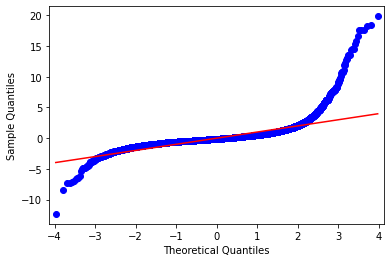

In [64]:
#QQ Plot
fig = sm.graphics.qqplot(model1.resid, line='s',dist=stats.norm, fit=True)

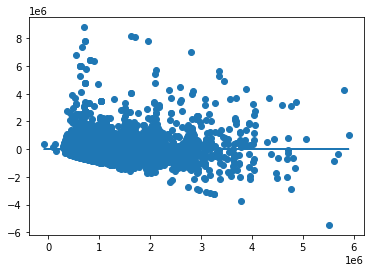

In [65]:
#Homoscedasticity
plt.scatter(model1.predict(comb_df[x_cols]), model1.resid)
plt.plot(model1.predict(comb_df[x_cols]), [0 for i in range(len(comb_df))]);

In [12]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0328758264135403
Rainbow p-value: 0.028396049659178135


## Model 2 - Model improvement

In [13]:
# testing with two highest correlations
outcome = 'SalePrice'      
x_cols =['BldgGrade','SqFtTotLiving']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=comb_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     8592.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:34:34   Log-Likelihood:            -4.0288e+05
No. Observations:               27786   AIC:                         8.058e+05
Df Residuals:                   27783   BIC:                         8.058e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.115e+05   1.47e+04    -41.515      0.000    -6.4e+05   -5.83e+05
BldgGrade      1.728e+05   3469.958     49.788      0.000    1.66e+05     1.8e+05
SqFtTotLiving   192.7278      4.331     44.503      0.000     184.239     201.216
==============================================================================
Omnibus:                    30487.130   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4576394.220
Skew:                           5.420   Prob(JB):                         0.00
Kurtosis:                      64.930   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

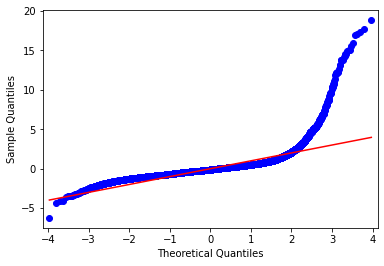

In [14]:
#QQ Plot
fig = sm.graphics.qqplot(model2.resid, line='s',dist=stats.norm, fit=True)

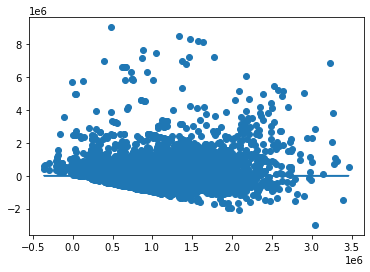

In [15]:
#Homoscedasticity
plt.scatter(model2.predict(comb_df[x_cols]), model2.resid)
plt.plot(model2.predict(comb_df[x_cols]), [0 for i in range(len(comb_df))]);

In [16]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9822382895461098
Rainbow p-value: 0.8545385930002379


In [17]:
X = comb_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


[('BldgGrade', 11.538480937837276), ('SqFtTotLiving', 11.538480937837276)]

## Model 3 - Model Improvement

In [18]:
# good Rainbow p-value... .03...
# good R2 = .504
# probability distribution, same with tails, with two outliers on either end?
# error distribution cone shape

In [19]:
# Removing P-values over .05
#Removing: 'Nuisances', 'OtherNuisances', 'Lake_Union', 'Fair', 'SqFtLot', 'WaterFrontLocation', ,  'Has_Porch',                
# 'Has_OpenPorch', 'Has_Nuisance', 'PowerLines', 'Has_EnclosedPorch', 'View_LakeSammamish',  'Has_Deck', 'Ship_Canal', 'Low',  'Cabin',  'Luxury', 

# removing after running because new p-values over .05: 'TrafficNoise' , 'View_Cascades', 'View_PugetSound'


outcome = 'SalePrice'      
x_cols =[
 'SqFtTotLiving',
  'Is_WaterFrontLocation',           
 'SeattleSkyline',                     
 'View_LakeWashington',             
 'View_SmallLakeRiverCreek',
     'View_MtRainier',           
 'View_Olympics',            
 'BldgGrade',                           
 'Has_Finished_Basement',    
 'Has_Attached_Garage',      
 'Duwamish',                 
 'Lake_Sammamish',              
 'Lake_Washington',          
 'Other_lake',               
 'Puget_Sound',              
 'River_or_slough',                                   
 'Low_Average',              
 'Average',                  
 'Good',                     
 'Better',                   
 'Very_Good',                                    
 'Excellent',                               
 'Mansion']                  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=comb_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1231.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:34:44   Log-Likelihood:            -3.9981e+05
No. Observations:               27786   AIC:                         7.997e+05
Df Residuals:                   27762   BIC:                         7.999e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.103e+05   3.43e+04     -6.123      0.000   -2.78e+05   -1.43e+05
SqFtTotLiving              185.1267      4.117     44.962      0.000     177.056     193.197
Is_WaterFrontLocation     5.977e+05   1.58e+05      3.772      0.000    2.87e+05    9.08e+05
SeattleSkyline            3.365e+05    2.9e+04     11.606      0.000     2.8e+05    3.93e+05
View_LakeWashington       1.537e+05   8348.547     18.407      0.000    1.37e+05     1.7e+05
View_SmallLakeRiverCreek  4.721e+04   1.51e+04      3.135      0.002    1.77e+04    7.67e+04
View_MtRainier           -3.097e+04   1.04e+04     -2.991      0.003   -5.13e+04   -1.07e+04
View_Olympics             6.091e+04   7011.193      8.688      0.000    4.72e+04    7.47e+04
BldgGrade                 1.899e+05   5945.238     31.944      0.000    1.78e+05    2.02e+05
Has_Finished_Basement     2.409e+04   6017.146      4.003      0.000    1.23e+04    3.59e+04
Has_Attached_Garage      -1.548e+05   6176.834    -25.058      0.000   -1.67e+05   -1.43e+05
Duwamish                 -7.941e+05   2.91e+05     -2.726      0.006   -1.37e+06   -2.23e+05
Lake_Sammamish            1.023e+06   1.72e+05      5.940      0.000    6.85e+05    1.36e+06
Lake_Washington            7.24e+05   1.66e+05      4.360      0.000    3.99e+05    1.05e+06
Other_lake               -6.892e+05   1.57e+05     -4.402      0.000   -9.96e+05   -3.82e+05
Puget_Sound              -3.557e+05   1.65e+05     -2.156      0.031   -6.79e+05   -3.23e+04
River_or_slough          -6.202e+05    1.6e+05     -3.866      0.000   -9.35e+05   -3.06e+05
Low_Average              -2.826e+05   2.26e+04    -12.528      0.000   -3.27e+05   -2.38e+05
Average                  -4.161e+05   2.06e+04    -20.206      0.000   -4.56e+05   -3.76e+05
Good                     -5.112e+05   2.13e+04    -24.022      0.000   -5.53e+05   -4.69e+05
Better                   -4.923e+05   2.36e+04    -20.824      0.000   -5.39e+05   -4.46e+05
Very_Good                 -3.39e+05   2.79e+04    -12.149      0.000   -3.94e+05   -2.84e+05
Excellent                -3.487e+05   3.93e+04     -8.865      0.000   -4.26e+05   -2.72e+05
Mansion                   3.983e+05    9.8e+04      4.062      0.000    2.06e+05     5.9e+05
==============================================================================
Omnibus:                    29355.018   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5656830.872
Skew:                           4.954   Prob(JB):                         0.00
Kurtosis:                      72.195   Cond. No.                     4.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

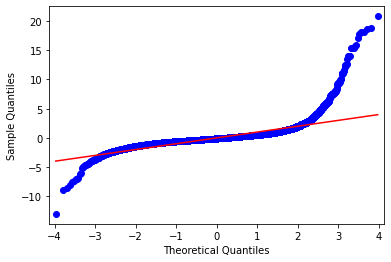

In [20]:
#QQ Plot
fig = sm.graphics.qqplot(model3.resid, line='s',dist=stats.norm, fit=True)

In [66]:
#Homoscedasticity
plt.scatter(model3.predict(comb_df[x_cols]), model3.resid)
plt.plot(model3.predict(comb_df[x_cols]), [0 for i in range(len(comb_df))], color ='red');

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'SqFtTotLiving' is not defined
    SalePrice~SqFtTotLiving+Is_WaterFrontLocation+SeattleSkyline+View_LakeWashington+View_SmallLakeRiverCreek+View_MtRainier+View_Olympics+BldgGrade+Has_Finished_Basement+Has_Attached_Garage+Duwamish+Lake_Sammamish+Lake_Washington+Other_lake+Puget_Sound+River_or_slough+Low_Average+Average+Good+Better+Very_Good+Excellent+Mansion
              ^^^^^^^^^^^^^

In [22]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model3)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0323552769646274
Rainbow p-value: 0.03034560156036285


In [23]:
X = comb_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


[('SqFtTotLiving', 14.829862710496949),
 ('Is_WaterFrontLocation', 64.94148406029147),
 ('SeattleSkyline', 1.1163794846359143),
 ('View_LakeWashington', 1.6722287287739832),
 ('View_SmallLakeRiverCreek', 2.4721201800511143),
 ('View_MtRainier', 1.0395569335973516),
 ('View_Olympics', 1.1578630454945433),
 ('BldgGrade', 71.77654634476363),
 ('Has_Finished_Basement', 2.190926580976048),
 ('Has_Attached_Garage', 3.106647640218971),
 ('Duwamish', 1.3793051341318525),
 ('Lake_Sammamish', 6.590588182161458),
 ('Lake_Washington', 17.64123123933737),
 ('Other_lake', 17.67133568476518),
 ('Puget_Sound', 13.287362106848727),
 ('River_or_slough', 11.71980437649035),
 ('Low_Average', 3.2194885337057983),
 ('Average', 15.465321453613992),
 ('Good', 19.625405566978596),
 ('Better', 11.916129684523767),
 ('Very_Good', 6.1959488174991755),
 ('Excellent', 3.395326538270187),
 ('Mansion', 1.2055853931656628)]

In [113]:
df_sqrtotal = comb_df[['SqFtTotLiving', 
         'Very_Good',
          'View_LakeWashington',
         'Excellent',  
         'Lake_Washington', 'Has_Attached_Garage',
         'Luxury', 'PowerLines',
         'Better',
         'Has_Porch','Has_Deck',
         'Mansion',
 'SeattleSkyline', 
         'View_Olympics', 'View_MtRainier',
         'Lake_Sammamish',
          'Has_Finished_Basement',
 'View_PugetSound',          
 'View_SmallLakeRiverCreek',                                   
 'Low_Average',              
 'Average']]    
df_sqrtotal.head()

,SqFtTotLiving,Very_Good,View_LakeWashington,Excellent,Lake_Washington,Has_Attached_Garage,Luxury,PowerLines,Better,Has_Porch,...,Mansion,SeattleSkyline,View_Olympics,View_MtRainier,Lake_Sammamish,Has_Finished_Basement,View_PugetSound,View_SmallLakeRiverCreek,Low_Average,Average
0,2240,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1200,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2134,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [114]:
corr_matrix = df_sqrtotal.corr()
print(corr_matrix["SqFtTotLiving"].sort_values(ascending=False))

SqFtTotLiving               1.000000
Very_Good                   0.356228
Has_Porch                   0.326771
Has_Attached_Garage         0.324302
Better                      0.317124
Excellent                   0.293321
Luxury                      0.234352
View_LakeWashington         0.158712
Mansion                     0.151901
Has_Finished_Basement       0.128116
View_Olympics               0.111656
Lake_Washington             0.094026
SeattleSkyline              0.084583
View_PugetSound             0.064992
Has_Deck                    0.063462
View_MtRainier              0.061952
Lake_Sammamish              0.052871
PowerLines                  0.019450
View_SmallLakeRiverCreek    0.018001
Low_Average                -0.308539
Average                    -0.349062
Name: SqFtTotLiving, dtype: float64


In [496]:
corr_matrix = comb_df.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice                   1.000000
BldgGrade                   0.581476
SqFtTotLiving               0.571867
Very_Good                   0.319422
View_LakeWashington         0.319140
Excellent                   0.295884
Lake_Washington             0.282498
Luxury                      0.253635
Is_WaterFrontLocation       0.216200
Better                      0.205022
Has_OpenPorch               0.181793
Has_Porch                   0.176378
Mansion                     0.170746
SeattleSkyline              0.156437
View_Olympics               0.150045
View_LakeSammamish          0.148652
Lake_Sammamish              0.142783
Has_Finished_Basement       0.135054
View_Cascades               0.109642
View_PugetSound             0.098700
Has_Deck                    0.091775
View_MtRainier              0.064629
Minor                       0.048387
Has_Attached_Garage         0.042360
Puget_Sound                 0.034046
View_SmallLakeRiverCreek    0.030134
Other_lake                  0.020896
S

## Model 4 - Model Improvement

In [ ]:
#VIF improved, all under 10.
#R2 = .493, slight decrease
#error spread cone shape, same
#distribution with tails, same
#confi number high, multicollinearity? slight improvement but still high
#rainbow p at .02.., slight improvement


In [124]:
#factors based on correlation, pos and negative to one decimal place
 
# removing after running because new p-values over .05:  , 'BldgGrade', 'Has_OpenPorch','Is_WaterFrontLocation', 'View_LakeSammamish'
##'View_Cascades'

outcome = 'SalePrice'      
x_cols =[ 
 #'SqFtTotLiving', 
         'Very_Good',
          'View_LakeWashington',
         'Excellent',  
         'Lake_Washington', 'Has_Attached_Garage',
         'Luxury', 
    'PowerLines',
         'Better',
         'Has_Porch','Has_Deck',
         'Mansion',
 'SeattleSkyline', 
         'View_Olympics', 'View_MtRainier',
         'Lake_Sammamish',
          'Has_Finished_Basement',
 'View_PugetSound',          
 'View_SmallLakeRiverCreek',                                   
 'Low_Average',              
 'Average']                  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=comb_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:40:26   Log-Likelihood:            -4.0076e+05
No. Observations:               27786   AIC:                         8.016e+05
Df Residuals:                   27765   BIC:                         8.017e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  7.03e+05   8148.989     86.267      0.000    6.87e+05    7.19e+05
Very_Good                 7.976e+05   1.27e+04     62.997      0.000    7.73e+05    8.22e+05
View_LakeWashington       1.743e+05   8708.712     20.020      0.000    1.57e+05    1.91e+05
Excellent                 1.304e+06   2.22e+04     58.871      0.000    1.26e+06    1.35e+06
Lake_Washington           1.244e+06   5.13e+04     24.226      0.000    1.14e+06    1.34e+06
Has_Attached_Garage      -7.252e+04   6085.059    -11.917      0.000   -8.44e+04   -6.06e+04
Luxury                    2.037e+06   4.02e+04     50.724      0.000    1.96e+06    2.12e+06
PowerLines               -6.655e+04    2.6e+04     -2.555      0.011   -1.18e+05   -1.55e+04
Better                    3.325e+05   8491.897     39.150      0.000    3.16e+05    3.49e+05
Has_Porch                 7.429e+04   5741.863     12.939      0.000     6.3e+04    8.55e+04
Has_Deck                 -1.614e+04   5841.911     -2.763      0.006   -2.76e+04   -4693.630
Mansion                   2.961e+06   9.18e+04     32.262      0.000    2.78e+06    3.14e+06
SeattleSkyline            3.139e+05      3e+04     10.475      0.000    2.55e+05    3.73e+05
View_Olympics             5.805e+04   9192.340      6.315      0.000       4e+04    7.61e+04
View_MtRainier           -2.242e+04   1.08e+04     -2.077      0.038   -4.36e+04   -1262.966
Lake_Sammamish            1.669e+06   6.98e+04     23.918      0.000    1.53e+06    1.81e+06
Has_Finished_Basement     1.125e+05   6318.879     17.811      0.000       1e+05    1.25e+05
View_PugetSound           3.189e+04   8891.315      3.587      0.000    1.45e+04    4.93e+04
View_SmallLakeRiverCreek  3.486e+04   9977.989      3.493      0.000    1.53e+04    5.44e+04
Low_Average              -2.704e+05   1.07e+04    -25.152      0.000   -2.91e+05   -2.49e+05
Average                  -1.592e+05   6511.846    -24.443      0.000   -1.72e+05   -1.46e+05
==============================================================================
Omnibus:                    28479.239   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4540204.551
Skew:                           4.759   Prob(JB):                         0.00
Kurtosis:                      64.895   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# features with over .05 correlation
outcome = 'SalePrice'      
x_cols =[#'SqFtLot',
 #'SqFtTotLiving',            
 #'Nuisances',           
 #'Has_Nuisance',             
 #'TrafficNoise',             
 #'PowerLines',               
 #'OtherNuisances',           
 'Is_WaterFrontLocation',    
 #'WaterFrontLocation',       
 #'Has_Porch',                
 #'Has_OpenPorch',            
 'Has_EnclosedPorch',        
 'View_MtRainier',           
 'View_Olympics',            
 #'View_Cascades',            
 'SeattleSkyline',           
 'View_PugetSound',          
 'View_LakeWashington',      
 #'View_LakeSammamish',       
 #'View_SmallLakeRiverCreek', 
 'BldgGrade',                
 'Has_Deck',                 
 #'Has_Finished_Basement',    
 'Has_Attached_Garage',      
 #'Duwamish',                 
 'Lake_Sammamish',           
 #'Lake_Union',               
 'Lake_Washington',          
 #'Other_lake',               
 #'Puget_Sound',              
 #'River_or_slough',          
 #'Ship_Canal',               
'Low',                      
 'Fair',                     
 'Low_Average',              
 'Average',                  
 'Good',                     
 'Better',                   
 'Very_Good',                
 'Cabin',                    
 'Excellent',                
 'Luxury',                 
 'Mansion']  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=comb_df).fit()
model4.summary()

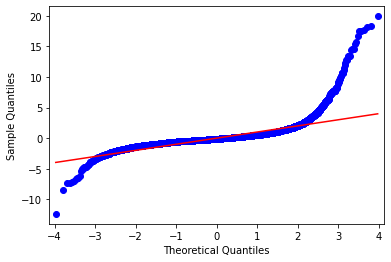

In [125]:
#QQ Plot
fig = sm.graphics.qqplot(model4.resid, line='s',dist=stats.norm, fit=True)

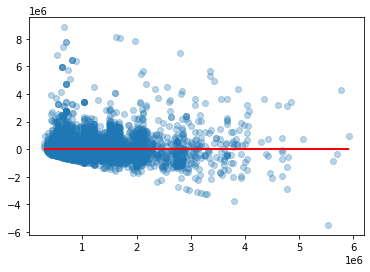

In [126]:
#Homoscedasticity
plt.scatter(model4.predict(comb_df[x_cols]), model4.resid, alpha=.3)
plt.plot(model4.predict(comb_df[x_cols]), [0 for i in range(len(comb_df))],color ='red');

In [127]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model4)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0303297297905045
Rainbow p-value: 0.03919128380221511


In [120]:
X = comb_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


[('SqFtTotLiving', 6.266629345989258),
 ('View_LakeWashington', 1.6881251447885937),
 ('Lake_Washington', 1.5569996840286766),
 ('Has_Attached_Garage', 2.7803518316969273),
 ('PowerLines', 1.0125238202778337),
 ('Has_Porch', 2.5634481176249007),
 ('Has_Deck', 2.0071914749478283),
 ('SeattleSkyline', 1.1057000594345447),
 ('View_Olympics', 1.8526325314084597),
 ('View_MtRainier', 1.0543184993577421),
 ('Lake_Sammamish', 1.0048400290940747),
 ('Has_Finished_Basement', 2.2293485278418332),
 ('View_PugetSound', 1.7949995419224836),
 ('View_SmallLakeRiverCreek', 1.0141074220636386)]

# Sale Price adjustments

In [471]:
df = pd.read_csv('../../data/clean/KingCountyHousingData.csv')
#df.info()

In [472]:
df = df[df['SalePrice'].between(df['SalePrice'].quantile(.010), df['SalePrice'].quantile(.980))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 27785
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                26958 non-null  int64 
 1   Major                     26958 non-null  int64 
 2   Minor                     26958 non-null  int64 
 3   ZipCode                   26958 non-null  int64 
 4   DocumentDate              26958 non-null  object
 5   SalePrice                 26958 non-null  int64 
 6   SqFtLot                   26958 non-null  int64 
 7   SqFtTotLiving             26958 non-null  int64 
 8   Nuisances                 26958 non-null  object
 9   Has_Nuisance              26958 non-null  int64 
 10  TrafficNoise              26958 non-null  int64 
 11  PowerLines                26958 non-null  int64 
 12  OtherNuisances            26958 non-null  int64 
 13  Is_WaterFrontLocation     26958 non-null  int64 
 14  WaterFrontLocation    

In [473]:
#creating dummies of Water Front Location, dropping None (doesn't have water front location)
df_water_dummie =pd.get_dummies(df['WaterFrontLocation'])
df_water_dummie.drop('None', axis= 1, inplace=True)
#df_water_dummie.head()

In [474]:
#creating dummies of Building Grade, dropping lowest grade--> 1= 'poor'
df_bldg_dummie = pd.get_dummies(df['BldgGrade'])
df_bldg_dummie.drop(1, axis= 1, inplace=True) 
#df_bldg_dummie.head()

In [475]:
#merge data frames
comb_df = pd.concat([df, df_water_dummie, df_bldg_dummie], axis=1)
#comb_df.head()

In [476]:
#re-name columns 
comb_df = comb_df.rename(columns={"Other lake": "Other_lake","Lake Sammamish":"Lake_Sammamish", 
                                  "Lake Union": "Lake_Union", "Lake Washington": "Lake_Washington", 
                                  "Puget Sound": "Puget_Sound", "River or slough":"River_or_slough", 
                                  "Ship Canal": "Ship_Canal", 2:'Low', 3:'Fair', 4:'Low_Average', 5:'Average',
                                  6 : 'Good', 7 : 'Better', 8 : 'Very_Good', 9 : 'Cabin', 10 : 'Excellent', 11 : 'Luxury', 12 : 'Mansion'})

#comb_df.info()

In [477]:
df['SalePrice'].mean()
df['SalePrice'].min()

147500

In [483]:
corr_matrix = comb_df.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice                   1.000000
BldgGrade                   0.618746
SqFtTotLiving               0.599517
Very_Good                   0.367399
Better                      0.337118
Excellent                   0.232174
Has_OpenPorch               0.215956
Has_Porch                   0.209348
View_LakeWashington         0.183288
View_Olympics               0.161266
Has_Finished_Basement       0.144490
Luxury                      0.133555
View_PugetSound             0.125218
SeattleSkyline              0.122929
View_Cascades               0.110929
View_LakeSammamish          0.109963
Has_Deck                    0.106144
Lake_Washington             0.083264
Is_WaterFrontLocation       0.077278
SqFtLot                     0.058700
Lake_Sammamish              0.056487
Minor                       0.056461
Has_Attached_Garage         0.040995
Puget_Sound                 0.037537
Other_lake                  0.035546
View_SmallLakeRiverCreek    0.032057
Cabin                       0.017446
M

## Model 4.1 - adjusted Sale price.
Try one .005, .995
Try two .006, .994
Try three .007, .997

In [485]:
# Removed after running because p>.05 = 'View_Cascades'
outcome = 'SalePrice'      
x_cols =[ 
 'SqFtTotLiving', 
         'Very_Good',
          'View_LakeWashington',
         'Excellent',  
         'Lake_Washington', 
         'Luxury',
         'Better',
         'Has_Porch',
    'Has_Deck',
         #'Mansion',
 'SeattleSkyline', 
         'View_Olympics',
         'Lake_Sammamish',
          'Has_Finished_Basement',
 'View_PugetSound',          
 'View_SmallLakeRiverCreek',                                   
 'Low_Average',              
 'Average']                  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4_1 = ols(formula=formula, data=comb_df).fit()
model4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1551.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:34:02   Log-Likelihood:            -3.7646e+05
No. Observations:               26958   AIC:                         7.530e+05
Df Residuals:                   26940   BIC:                         7.531e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  4.18e+05   6822.194     61.268      0.000    4.05e+05    4.31e+05
SqFtTotLiving              116.4357      2.720     42.805      0.000     111.104     121.767
Very_Good                 4.816e+05   9153.921     52.617      0.000    4.64e+05       5e+05
View_LakeWashington       1.045e+05   6104.123     17.118      0.000    9.25e+04    1.16e+05
Excellent                  5.84e+05   1.72e+04     33.875      0.000     5.5e+05    6.18e+05
Lake_Washington           3.203e+05   5.12e+04      6.257      0.000     2.2e+05    4.21e+05
Luxury                      7.3e+05   3.79e+04     19.270      0.000    6.56e+05    8.04e+05
Better                    2.414e+05   5730.471     42.118      0.000     2.3e+05    2.53e+05
Has_Porch                 2.662e+04   3784.557      7.035      0.000    1.92e+04     3.4e+04
Has_Deck                  9964.3719   3750.583      2.657      0.008    2613.034    1.73e+04
SeattleSkyline            2.157e+05   2.08e+04     10.385      0.000    1.75e+05    2.56e+05
View_Olympics             5.196e+04   6137.000      8.467      0.000    3.99e+04     6.4e+04
Lake_Sammamish            8.572e+05   8.12e+04     10.551      0.000    6.98e+05    1.02e+06
Has_Finished_Basement     8.466e+04   3896.747     21.726      0.000     7.7e+04    9.23e+04
View_PugetSound           3.192e+04   5863.850      5.443      0.000    2.04e+04    4.34e+04
View_SmallLakeRiverCreek  2.823e+04   6599.690      4.278      0.000    1.53e+04    4.12e+04
Low_Average              -1.229e+05   7053.417    -17.424      0.000   -1.37e+05   -1.09e+05
Average                  -8.937e+04   4289.332    -20.835      0.000   -9.78e+04    -8.1e+04
==============================================================================
Omnibus:                     6540.852   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27416.434
Skew:                           1.142   Prob(JB):                         0.00
Kurtosis:                       7.380   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

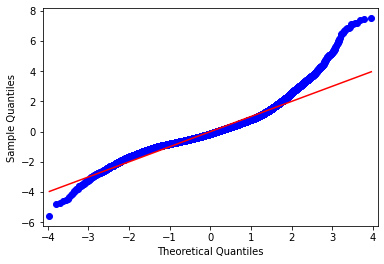

In [486]:
#QQ Plot
fig = sm.graphics.qqplot(model4_1.resid, line='s',dist=stats.norm, fit=True)

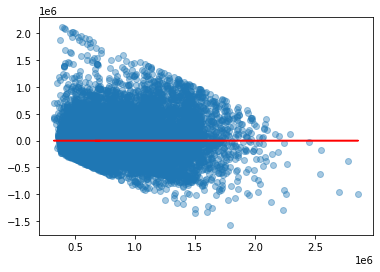

In [489]:
#Homoscedasticity
plt.scatter(model4_1.predict(comb_df[x_cols]), model4_1.resid, alpha =.4)
plt.plot(model4_1.predict(comb_df[x_cols]),[0 for i in range(len(comb_df))],color ='red');

In [487]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model4_1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0335882734710233
Rainbow p-value: 0.02761747001265538


In [488]:
X = comb_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('SqFtTotLiving', 5.71074577397561),
 ('Very_Good', 1.3206010431427073),
 ('View_LakeWashington', 1.3145562868518585),
 ('Excellent', 1.1197312954324796),
 ('Lake_Washington', 1.2272200449930903),
 ('Luxury', 1.0331349563310621),
 ('Better', 1.6131959494575685),
 ('Has_Porch', 2.621015454095478),
 ('Has_Deck', 2.0322248037818453),
 ('SeattleSkyline', 1.0707638156729133),
 ('View_Olympics', 1.8373058901693504),
 ('Lake_Sammamish', 1.002851709068029),
 ('Has_Finished_Basement', 2.0598632042879133),
 ('View_PugetSound', 1.806578673478268),
 ('View_SmallLakeRiverCreek', 1.011555402619638),
 ('Low_Average', 1.067526945512876),
 ('Average', 1.5651865865209074)]

## Model 3_1 --

In [ ]:
#rainbow p at .006, .994 = .004


In [295]:
#removed after running pvalude>.05 :   'Lake_Washington', 'Mansion', 'Very_Good',

outcome = 'SalePrice'      
x_cols =[
 'SqFtTotLiving',
  'Is_WaterFrontLocation',           
 'SeattleSkyline',                     
 'View_LakeWashington',             
 'View_SmallLakeRiverCreek',
     'View_MtRainier',           
 'View_Olympics',            
 #'BldgGrade',                           
 'Has_Finished_Basement',    
 'Has_Attached_Garage',      
 'Duwamish',                 
 'Lake_Sammamish',                        
 'Other_lake',               
 'Puget_Sound',              
 'River_or_slough',                                   
 'Low_Average',              
 'Average',                  
 'Good',                     
 'Better',                                                       
 'Excellent']                  

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3_1 = ols(formula=formula, data=comb_df).fit()
model3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:48:33   Log-Likelihood:            -3.7745e+05
No. Observations:               26963   AIC:                         7.549e+05
Df Residuals:                   26943   BIC:                         7.551e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 7.582e+05   1.08e+04     70.516      0.000    7.37e+05    7.79e+05
SqFtTotLiving              186.1166      2.688     69.240      0.000     180.848     191.385
Is_WaterFrontLocation     4.926e+05   4.42e+04     11.146      0.000    4.06e+05    5.79e+05
SeattleSkyline            2.574e+05    2.1e+04     12.276      0.000    2.16e+05    2.99e+05
View_LakeWashington       1.035e+05   6035.496     17.141      0.000    9.16e+04    1.15e+05
View_SmallLakeRiverCreek  2.294e+04   1.04e+04      2.216      0.027    2647.170    4.32e+04
View_MtRainier           -3.875e+04   7688.063     -5.040      0.000   -5.38e+04   -2.37e+04
View_Olympics             6.969e+04   4900.617     14.220      0.000    6.01e+04    7.93e+04
Has_Finished_Basement     2.965e+04   4136.865      7.168      0.000    2.15e+04    3.78e+04
Has_Attached_Garage      -1.279e+05   4243.067    -30.143      0.000   -1.36e+05    -1.2e+05
Duwamish                 -7.703e+05   1.74e+05     -4.419      0.000   -1.11e+06   -4.29e+05
Lake_Sammamish            5.848e+05   7.87e+04      7.429      0.000     4.3e+05    7.39e+05
Other_lake               -4.742e+05   5.58e+04     -8.491      0.000   -5.84e+05   -3.65e+05
Puget_Sound              -2.939e+05   5.51e+04     -5.332      0.000   -4.02e+05   -1.86e+05
River_or_slough          -5.958e+05   5.64e+04    -10.565      0.000   -7.06e+05   -4.85e+05
Low_Average              -4.922e+05   1.06e+04    -46.549      0.000   -5.13e+05   -4.71e+05
Average                  -4.468e+05   8579.722    -52.080      0.000   -4.64e+05    -4.3e+05
Good                     -3.695e+05   8121.195    -45.498      0.000   -3.85e+05   -3.54e+05
Better                   -1.602e+05   8458.163    -18.939      0.000   -1.77e+05   -1.44e+05
Excellent                 1.596e+05   1.76e+04      9.051      0.000    1.25e+05    1.94e+05
==============================================================================
Omnibus:                     6675.901   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30917.772
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       7.729   Cond. No.                     2.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

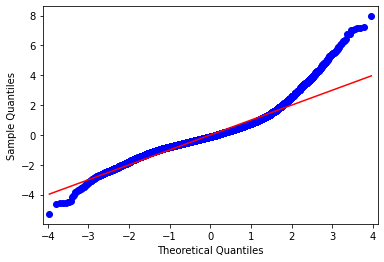

In [296]:
#QQ Plot
fig = sm.graphics.qqplot(model3_1.resid, line='s',dist=stats.norm, fit=True)

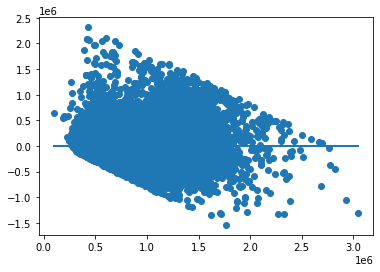

In [297]:
#Homoscedasticity
plt.scatter(model3_1.predict(comb_df[x_cols]), model3_1.resid)
plt.plot(model3_1.predict(comb_df[x_cols]), [0 for i in range(len(comb_df))]);

In [298]:
#Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model3_1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0623642177769894
Rainbow p-value: 0.0002236577230062783


In [299]:
X = comb_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('SqFtTotLiving', 6.862960845283415),
 ('Is_WaterFrontLocation', 8.33734539064258),
 ('SeattleSkyline', 1.0805626610354313),
 ('View_LakeWashington', 1.3152139333433068),
 ('View_SmallLakeRiverCreek', 2.3749367416447162),
 ('View_MtRainier', 1.0226270698253896),
 ('View_Olympics', 1.1333891805561125),
 ('Has_Finished_Basement', 2.1785417313517357),
 ('Has_Attached_Garage', 3.092413030627628),
 ('Duwamish', 1.0775162347246143),
 ('Lake_Sammamish', 1.4654129884950424),
 ('Other_lake', 4.572649629701691),
 ('Puget_Sound', 3.0192267409288895),
 ('River_or_slough', 2.8579640173746776),
 ('Low_Average', 1.1158491706818443),
 ('Average', 2.20200756303354),
 ('Good', 2.6912789093550864),
 ('Better', 2.1338884358051784),
 ('Excellent', 1.2045541949876064)]